In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline
from sklearn import preprocessing

In [2]:
data=pd.read_csv('prices.csv',index_col='date')
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division

In [3]:
data['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [4]:
apple=data[data['symbol']=='AAPL']
google=data[data['symbol']=='GOOG']
microsoft=data[data['symbol']=='MSFT']
amazon=data[data['symbol']=='AMZN']

In [5]:
# data.head(np.random.randint(1,1000))
# data.iloc[np.random.randint(1,1000):np.random.randint(1,1000)]
# data.shape
# data.size/
# apple.describe()
# google.describe()
# microsoft.describe()
# amazon.describe()
data

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0


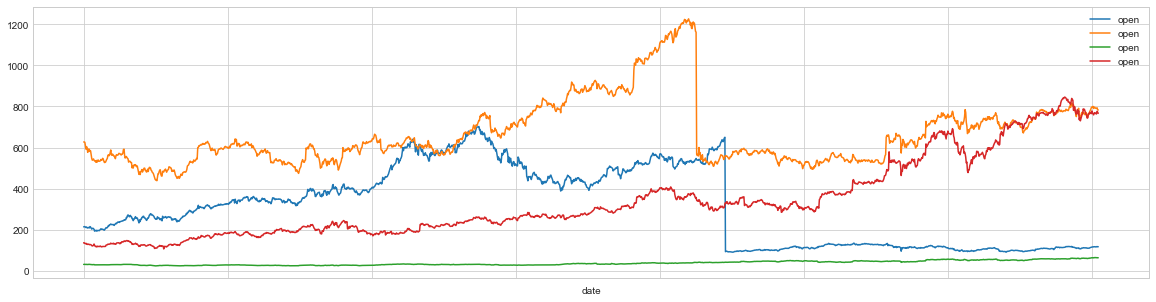

In [6]:
ax=apple['open'].plot(figsize=(20,5))
ax=google['open'].plot(figsize=(20,5))
ax=microsoft['open'].plot(figsize=(20,5))
ax=amazon['open'].plot(figsize=(20,5))
ax.legend()

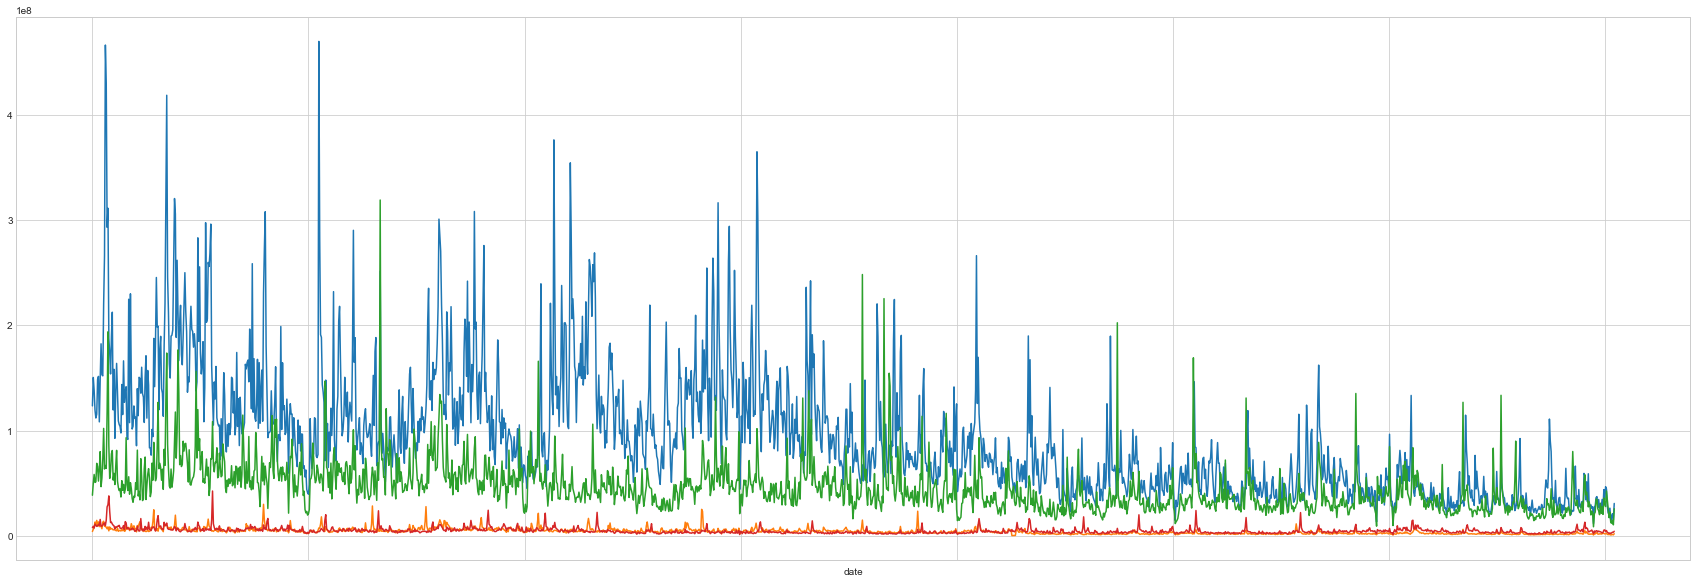

In [7]:
apple['volume'].plot(figsize=(30,10))
google['volume'].plot(figsize=(30,10))
microsoft['volume'].plot(figsize=(30,10))
amazon['volume'].plot(figsize=(30,10))

/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).mean()
  
/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


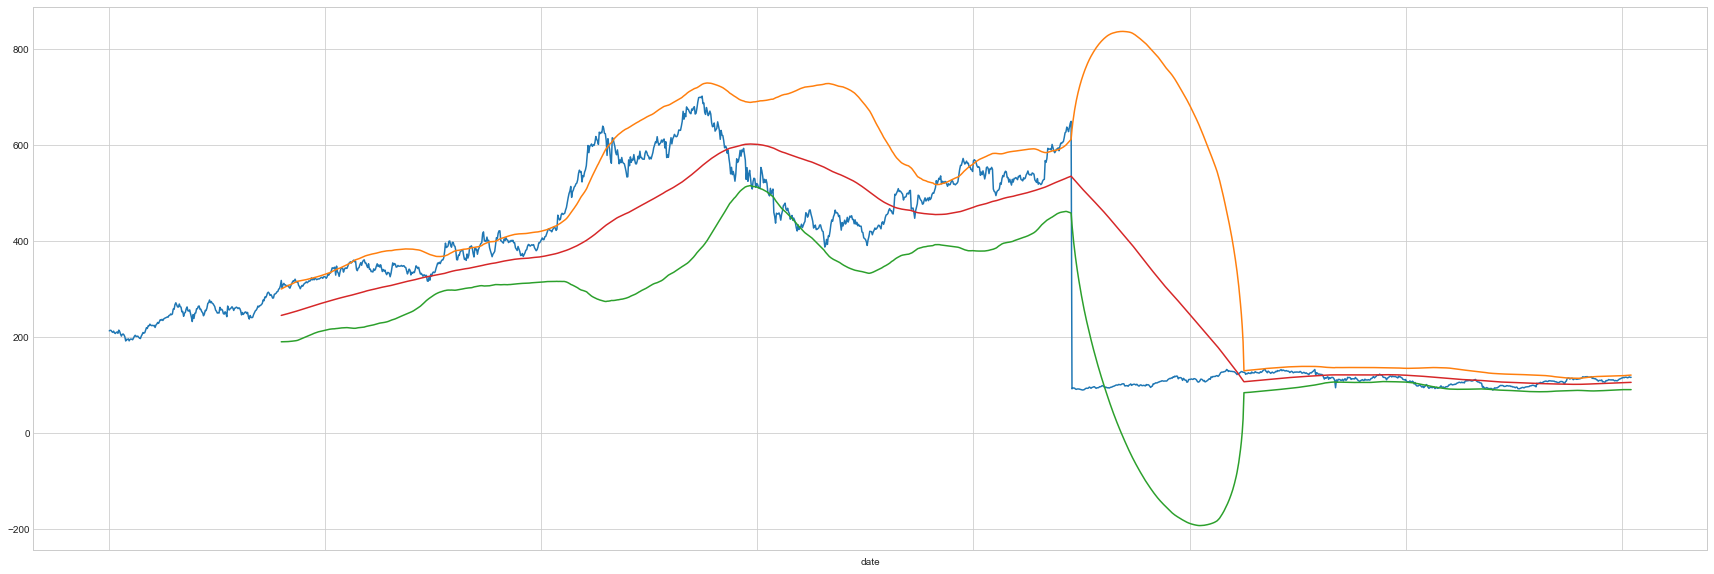

In [8]:
apple['open'].plot(figsize=(30,10))
x=pd.rolling_mean(apple['open'],200)
y=pd.rolling_std(apple['open'],200)
upperband=x+y*2
lowerband=x-y*2
upperband.plot(figsize=(30,10))
lowerband.plot(figsize=(30,10))
x.plot(figsize=(30,10))

/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).mean()
  
/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


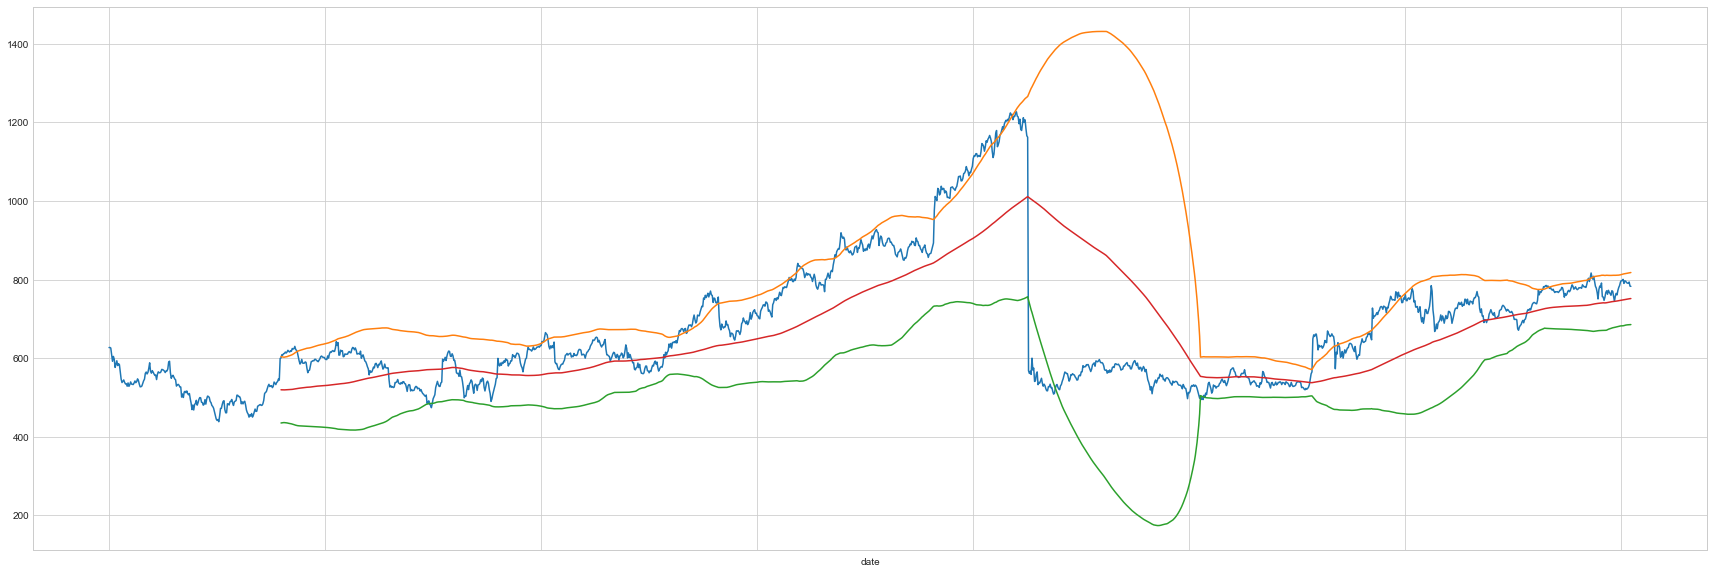

In [9]:
google['open'].plot(figsize=(30,10))
x=pd.rolling_mean(google['open'],200)
y=pd.rolling_std(google['open'],200)
upperband=x+y*2
lowerband=x-y*2
upperband.plot(figsize=(30,10))
lowerband.plot(figsize=(30,10))
x.plot(figsize=(30,10))

/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).mean()
  
/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


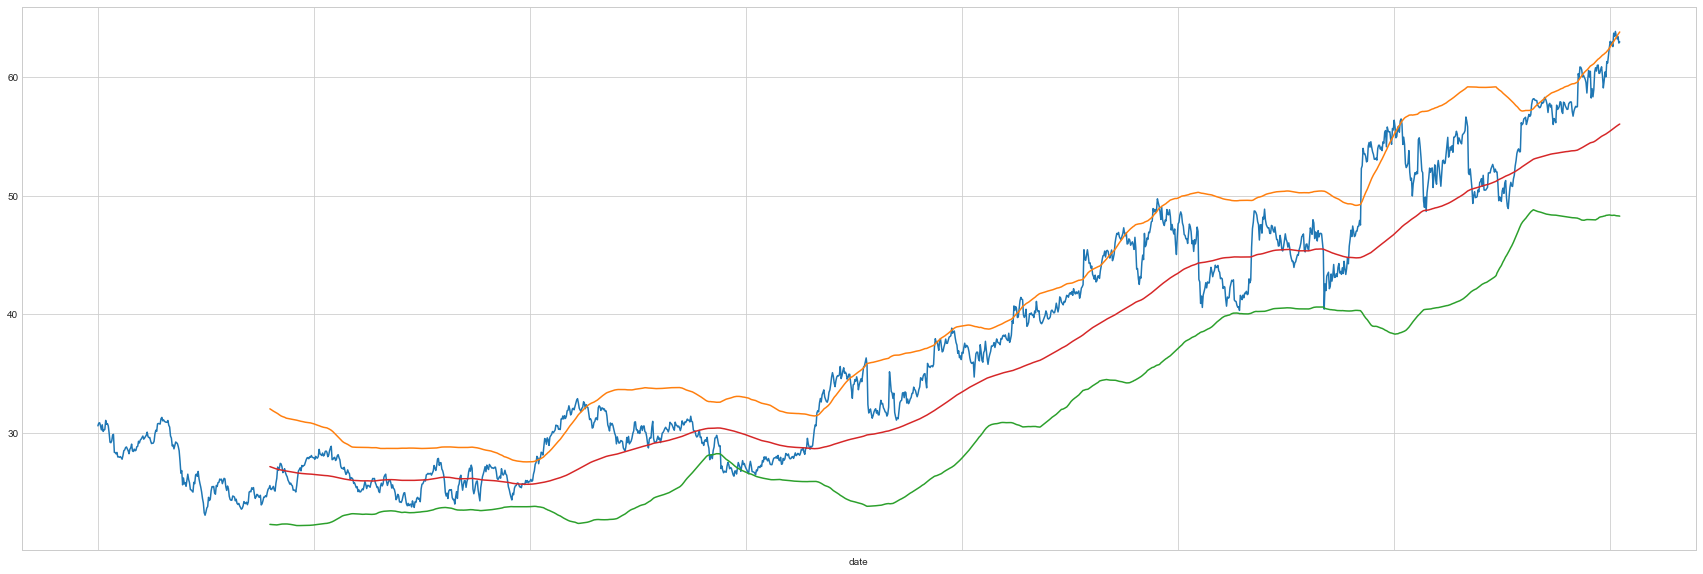

In [10]:
microsoft['open'].plot(figsize=(30,10))
x=pd.rolling_mean(microsoft['open'],200)
y=pd.rolling_std(microsoft['open'],200)
upperband=x+y*2
lowerband=x-y*2
upperband.plot(figsize=(30,10))
lowerband.plot(figsize=(30,10))
x.plot(figsize=(30,10))

/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).mean()
  
/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


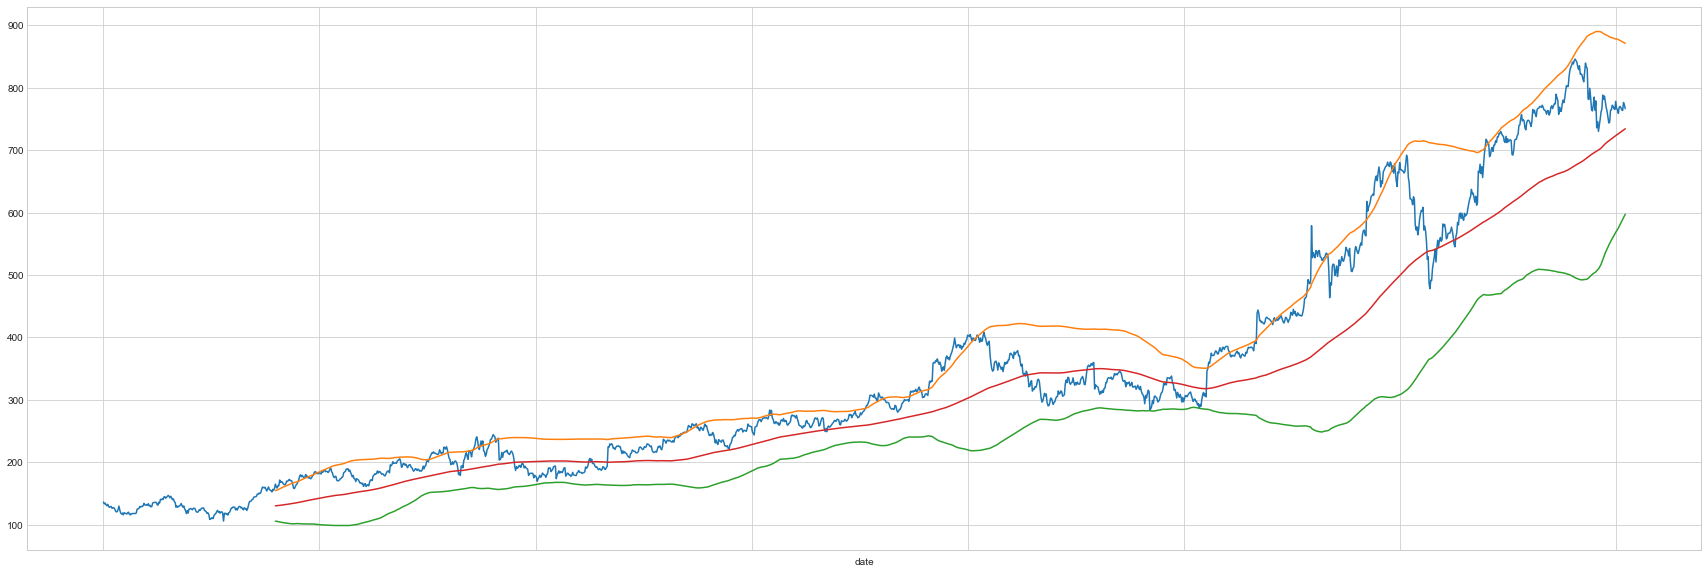

In [11]:
amazon['open'].plot(figsize=(30,10))
x=pd.rolling_mean(amazon['open'],200)
y=pd.rolling_std(amazon['open'],200)
upperband=x+y*2
lowerband=x-y*2
upperband.plot(figsize=(30,10))
lowerband.plot(figsize=(30,10))
x.plot(figsize=(30,10))

/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

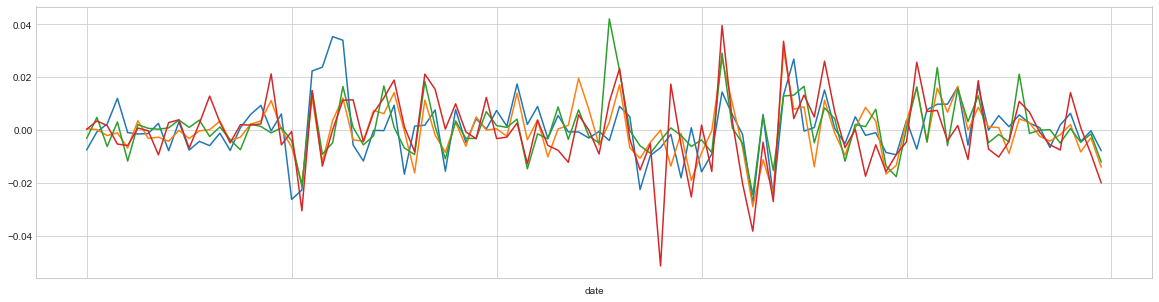

In [12]:
apple['daily_return']=apple['close'].pct_change()
apple['daily_return'][-100:].plot(figsize=(20,5))
google['daily_return']=google['close'].pct_change()
google['daily_return'][-100:].plot(figsize=(20,5))
microsoft['daily_return']=microsoft['close'].pct_change()
microsoft['daily_return'][-100:].plot(figsize=(20,5))
amazon['daily_return']=amazon['close'].pct_change()
amazon['daily_return'][-100:].plot(figsize=(20,5))


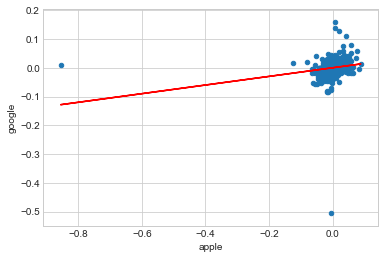

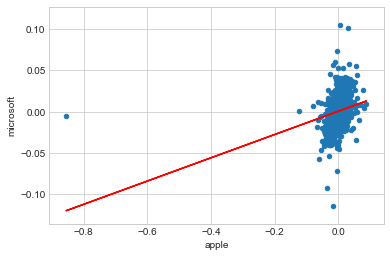

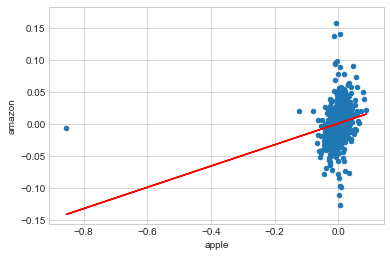

In [13]:
daily_return=pd.DataFrame([apple['daily_return'],google['daily_return'],microsoft['daily_return'],amazon['daily_return']],index=['apple','google','microsoft','amazon']).transpose().dropna()
daily_return.plot(kind='scatter',x='apple',y='google')
m,c=np.polyfit(daily_return['apple'],daily_return['google'],1)
plt.plot(daily_return['apple'],m*daily_return['apple']+c,'r-')
plt.show()
daily_return.plot(kind='scatter',x='apple',y='microsoft')
m1,c1=np.polyfit(daily_return['apple'],daily_return['microsoft'],1)
plt.plot(daily_return['apple'],m1*daily_return['apple']+c1,'r-')
plt.show()
m2,c2=np.polyfit(daily_return['apple'],daily_return['amazon'],1)
daily_return.plot(kind='scatter',x='apple',y='amazon')
plt.plot(daily_return['apple'],m2*daily_return['apple']+c2,'r-')
plt.show()


In [14]:
#correlation matrix of tech_gaint
daily_return.corr(method='pearson')

,apple,google,microsoft,amazon
apple,1.000000,0.198667,0.252587,0.213682
google,0.198667,1.000000,0.384353,0.418696
microsoft,0.252587,0.384353,1.000000,0.406907
amazon,0.213682,0.418696,0.406907,1.000000


In [46]:
open_price=pd.DataFrame([apple['open'],google['open'],microsoft['open'],amazon['open']],index=['apple','google','microsoft','amazon']).transpose().dropna()
x = open_price.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm = pd.DataFrame(x_scaled)
norm


,0,1,2,3
0,0.201548,0.239242,0.184785,0.040981
1,0.203458,0.239534,0.190429,0.037169
2,0.203099,0.237860,0.191166,0.038751
3,0.198805,0.216984,0.185031,0.035250
4,0.196437,0.194917,0.176442,0.033290
5,0.200519,0.210719,0.186994,0.036074
6,0.194625,0.202082,0.173252,0.031168
7,0.192469,0.175246,0.175951,0.029695
8,0.196127,0.184644,0.177178,0.031371
9,0.197466,0.196616,0.196074,0.031425


/home/pk/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


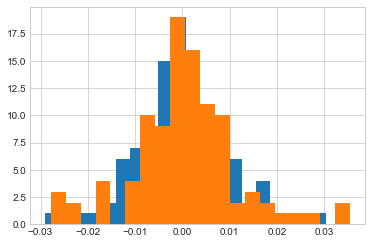

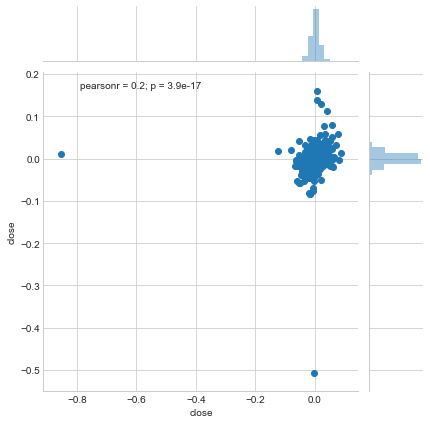

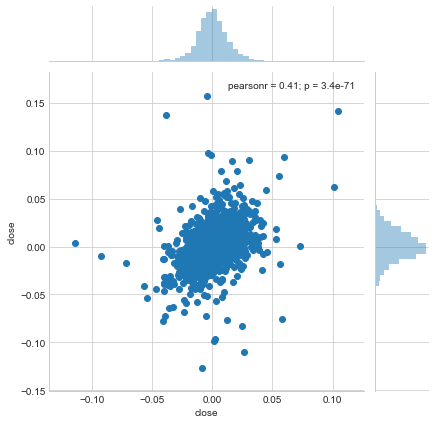

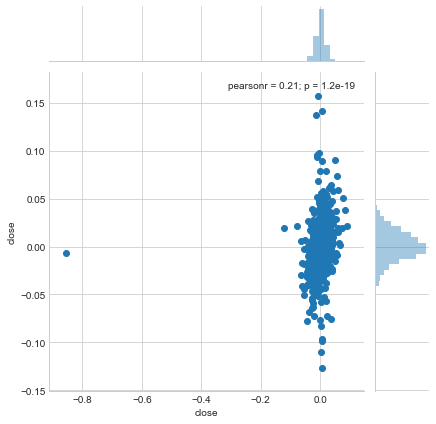

In [16]:
google['close'].pct_change().kurt
google['close'].pct_change()[-100:].hist(bins=20,label='goog')
apple['close'].pct_change()[-100:].hist(bins=20,label='aapl')
# plt.axvline(google['close'].pct_change().mean(),color='r')
# plt.axvline(google['close'].pct_change().std(),color='y')
# plt.axvline(-google['close'].pct_change().std(),color='y')
sb.jointplot(apple['close'].pct_change(),google['close'].pct_change(),kind='scatter')
sb.jointplot(microsoft['close'].pct_change(),amazon['close'].pct_change(),kind='scatter')
sb.jointplot(apple['close'].pct_change(),amazon['close'].pct_change(),kind='scatter')

/home/pk/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


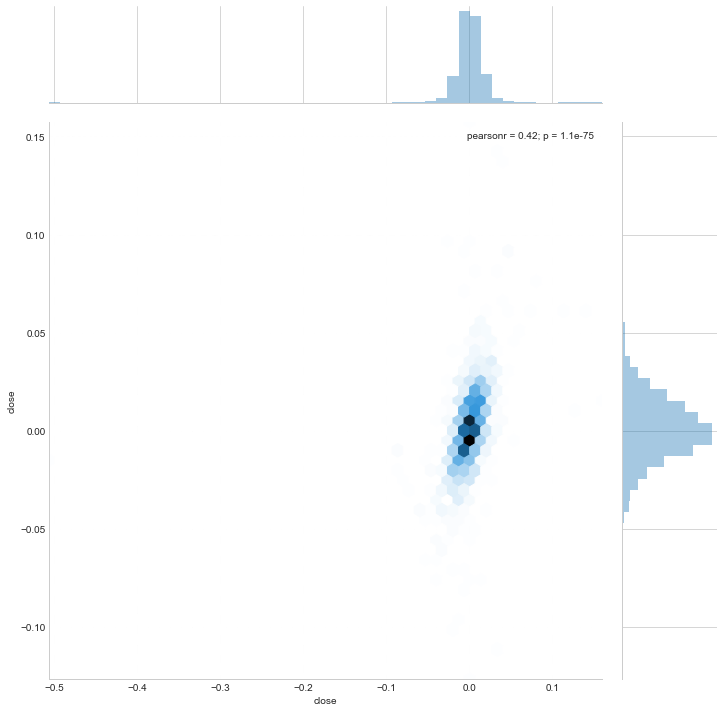

In [17]:
sb.jointplot(google['close'].pct_change(),amazon['close'].pct_change(),kind='hex',size=(10))

/home/pk/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


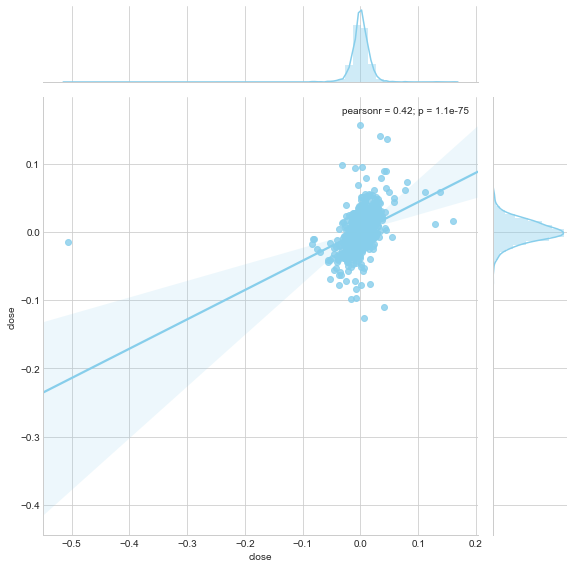

In [18]:
sb.jointplot(google['close'].pct_change(),amazon['close'].pct_change(), kind='reg', size=8, color='skyblue')

/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/pk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

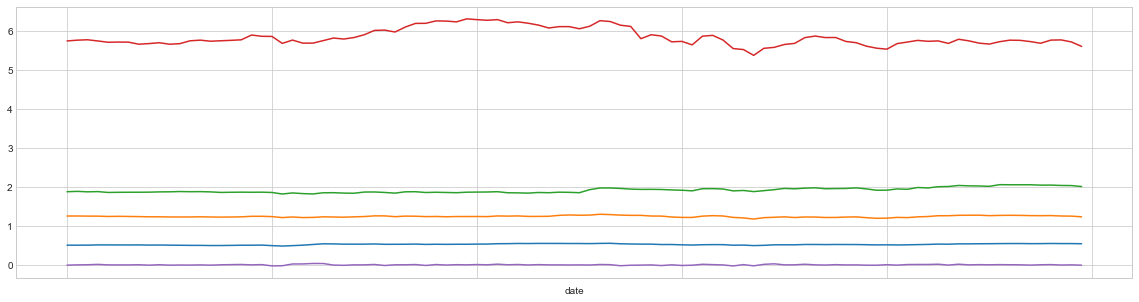

In [19]:
# calculate cumluative return
apple['cumluative_return'] = np.exp(np.log1p(apple['daily_return']).cumsum())
apple['cumluative_return'][-100:].plot(figsize=(20,5))
google['cumluative_return'] = np.exp(np.log1p(google['daily_return']).cumsum())
google['cumluative_return'][-100:].plot(figsize=(20,5))
microsoft['cumluative_return'] = np.exp(np.log1p(microsoft['daily_return']).cumsum())
microsoft['cumluative_return'][-100:].plot(figsize=(20,5))
amazon['cumluative_return'] = np.exp(np.log1p(amazon['daily_return']).cumsum())
amazon['cumluative_return'][-100:].plot(figsize=(20,5))
apple['daily_return'][-100:].plot(figsize=(20,5))